# Machine Learning on MCU - Ex4

# Feature Extraction & Regularization in Machine Learning

## Part 1: Regression

In [3]:
import numpy as np
import random
import matplotlib.pyplot as plt 

def generate_data(lowest, highest, amount):
    x = np.linspace(lowest, highest, num=amount)
    y = []
    noise = 400
    random.seed(123)

    for p in x:
        y.append(10 + 0.5*p - 0.08*p**2 - 0.002*p**3 + 0.0003*p**4 - 0.00001*p**5 + random.randint(-noise,noise)/100)
  
    return x, y 


[682.71155468]


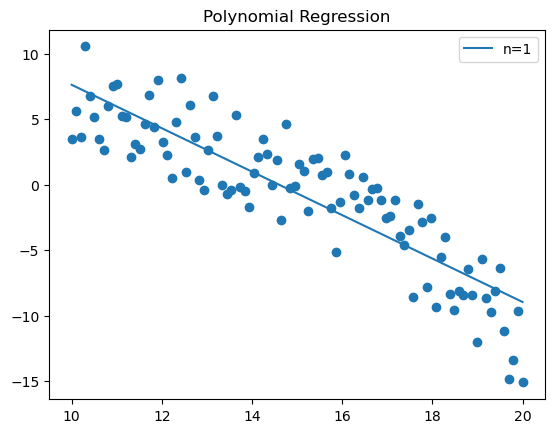

[501.59133736]


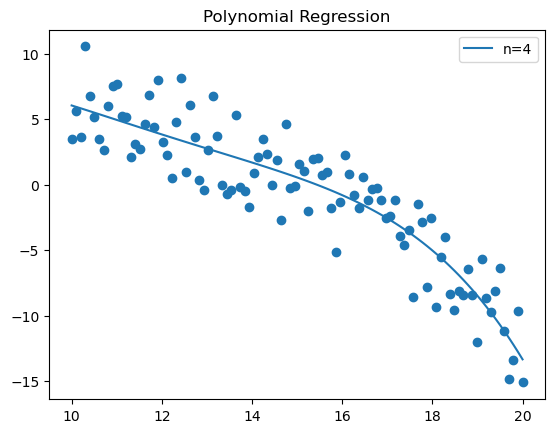

[490.78987101]


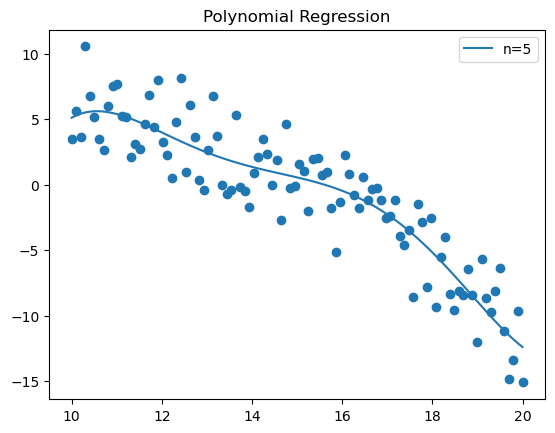

[487.98936868]


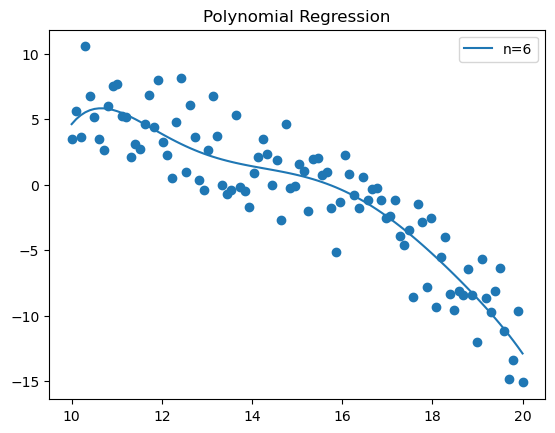

[468.46043433]


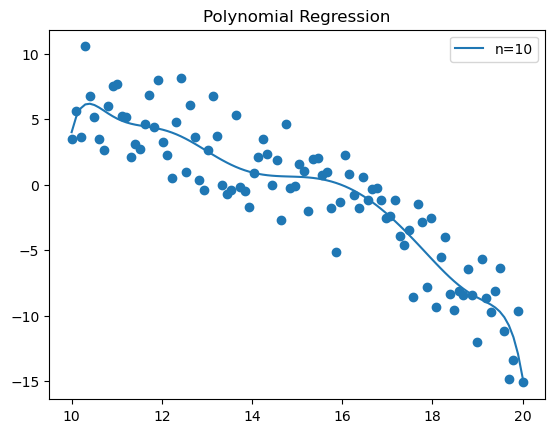

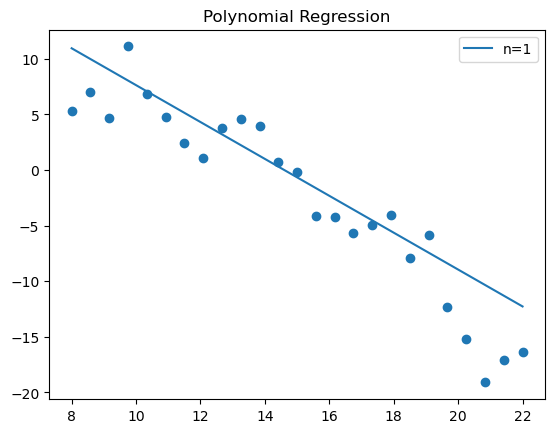

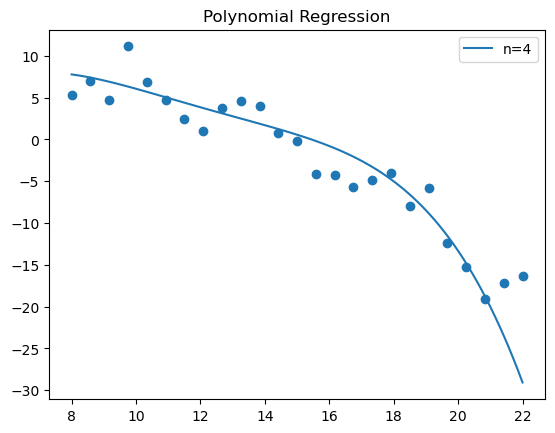

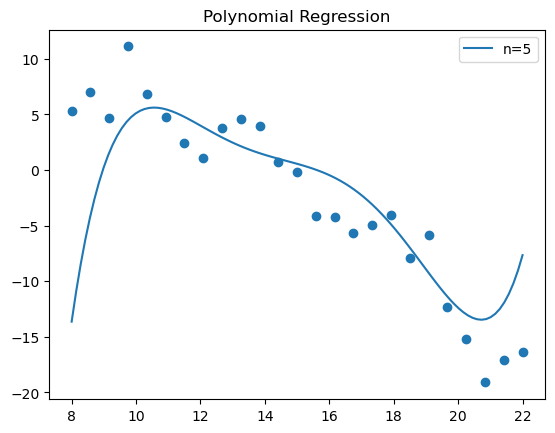

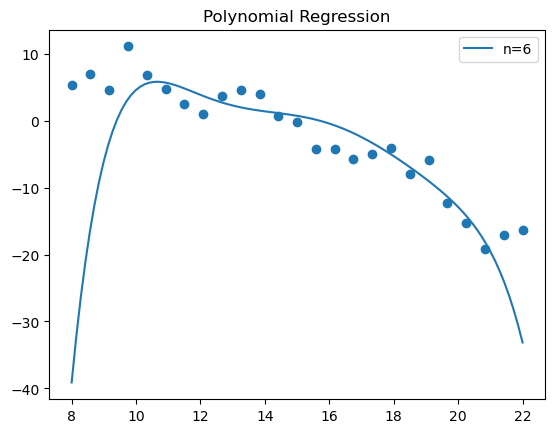

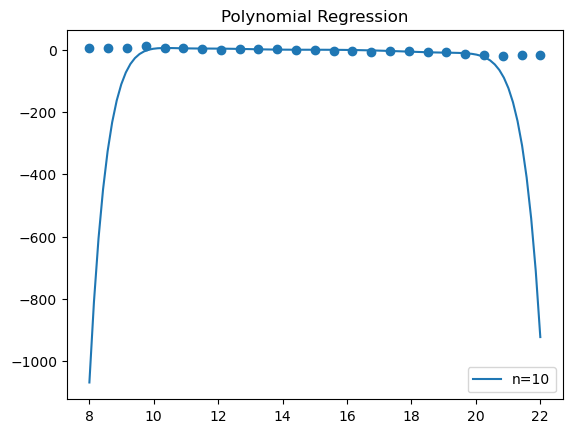

In [6]:
# Generate some data based on parameters
lowest = 10
highest = 20
amount = 100

x, y = generate_data(lowest, highest, amount)

# Do the regression while plotting
models = []
degrees = [1, 4, 5, 6, 10]

line = np.linspace(lowest, highest, 100)


for i, deg in enumerate(degrees):
    plt.scatter(x, y)
    plt.title("Polynomial Regression")
    p, residuals, rank, singular_values, rcond = np.polyfit(x, y, deg, full=True)
    print(residuals)
    models.append(np.poly1d(p))
    plt.plot(line, models[i](line), label = "n="+str(deg))
    plt.legend()
    plt.show() 

# Generate data based on new parameters
lowest = 8 
highest = 22
amount = 25

line = np.linspace(lowest, highest, 100)
x, y = generate_data(lowest, highest, amount)

# Plot without fitting to see how the models generalize
for i, deg in enumerate(degrees):
    plt.title("Polynomial Regression")
    plt.scatter(x, y, c="C{}".format(0))
    plt.plot(line, models[i](line), label = "n="+str(deg))
    plt.legend()
    plt.show() 


# regularization

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.optimizers import Adam
from tensorflow.random import set_seed

def shuffle_lists(x, y):
    data = list(zip(x, y))
    random.shuffle(data)
    x, y = zip(*data)
    x = np.asarray(x)
    y = np.asarray(y)
    return x, y

def normalize_data(x):
    mean = np.mean(x)
    x = x-mean
    dev = np.max(x)
    x = x/dev
    return x, mean, dev

def generate_data(lowest, highest, amount):
    x = np.linspace(lowest, highest, num=amount)
    y = []
    noise = 1000
    random.seed(123)

    for p in x:
        y.append(10 + 0.5*p - 0.04*p**2 + 0.002*p**3 + 0.0003*p**4 - 0.00001*p**5 + random.randint(-noise,noise)/100)
  
    return x, y 


Epoch 1/100
6/6 [==============================] - 2s 97ms/step - loss: 0.2701 - accuracy: 0.0000e+00 - val_loss: 0.2493 - val_accuracy: 0.0000e+00
Epoch 2/100
6/6 [==============================] - 0s 16ms/step - loss: 0.2649 - accuracy: 0.0000e+00 - val_loss: 0.2507 - val_accuracy: 0.0000e+00
Epoch 3/100
6/6 [==============================] - 0s 17ms/step - loss: 0.2592 - accuracy: 0.0000e+00 - val_loss: 0.2472 - val_accuracy: 0.0000e+00
Epoch 4/100
6/6 [==============================] - 0s 23ms/step - loss: 0.2546 - accuracy: 0.0000e+00 - val_loss: 0.2434 - val_accuracy: 0.0000e+00
Epoch 5/100
6/6 [==============================] - 0s 20ms/step - loss: 0.2404 - accuracy: 0.0000e+00 - val_loss: 0.2335 - val_accuracy: 0.0000e+00
Epoch 6/100
6/6 [==============================] - 0s 18ms/step - loss: 0.2226 - accuracy: 0.0000e+00 - val_loss: 0.2197 - val_accuracy: 0.0000e+00
Epoch 7/100
6/6 [==============================] - 0s 17ms/step - loss: 0.1996 - accuracy: 0.0000e+00 - val_loss

C:\Users\mathi\AppData\Local\Temp\ipykernel_6960\113216871.py:98: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


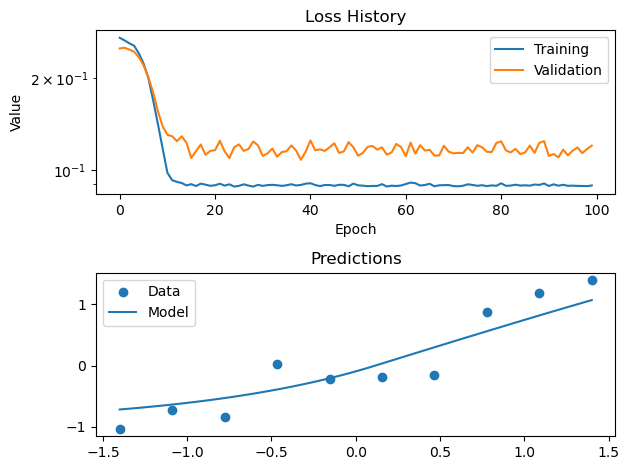

In [8]:
# Model configuration
dropout   = False
batchnorm = False
normalize = True

batch_size = 16
no_epochs = 100
optimizer = Adam()
validation_split = 0.1
plot_name = "plot_default.pdf"

# Regularization techniques
if dropout:
    from tensorflow.keras.layers import Dropout
    dropout_rate = 0.2
    dropout = True
    plot_name = "plot_dropout.pdf"
if batchnorm:
    from tensorflow.keras.layers import BatchNormalization
    batchnorm = True
    plot_name = "plot_batchnorm.pdf"

# Generate data
dataset_size = 100

x, y = generate_data(10, 20, dataset_size)
input_train, target_train =  shuffle_lists(x, y)

validation_size = 10
x, y = generate_data(8, 22, validation_size)
input_test, target_test =  shuffle_lists(x, y)

if normalize:
    input_train, mean_in, dev_in = normalize_data(input_train)
    target_train, mean_tar, dev_tar = normalize_data(target_train)
    input_test = (input_test-mean_in)/dev_in
    target_test = (target_test-mean_tar)/dev_tar

input_train  = input_train.reshape(len(input_train), 1)
target_train = target_train.reshape(len(target_train), 1)
input_test   = input_test.reshape(len(input_test), 1)
target_test  = target_test.reshape(len(target_test), 1)

# Create the model
model = Sequential()
model.add(Dense(16, activation=lambda x: x**2, input_dim=1))
model.add(Dense(512, activation='elu'))
if dropout:
    model.add(Dropout(dropout_rate))
if batchnorm:
    model.add(BatchNormalization())
model.add(Dense(1, activation='elu'))

# Compile the model
model.compile(loss=MeanSquaredError(),
              optimizer=optimizer,
              metrics=['accuracy'])

# Fit model to data
set_seed(123)
history = model.fit(input_train,
                    target_train,
                    batch_size=batch_size,
                    epochs=no_epochs,
                    verbose=True,
                    validation_split=validation_split)

# Generate generalization metrics
score = model.evaluate(input_test, target_test, verbose=0)
print(f'Test loss: {score[0]}')

# Visualize history
fig, ax = plt.subplots(2, 1)

# Plot loss history
ax[0].plot(history.history['loss'], label='Training')
ax[0].plot(history.history['val_loss'], label='Validation')
ax[0].set_title('Loss History')
ax[0].set_ylabel('Value')
ax[0].set_yscale('log')
ax[0].set_xlabel('Epoch')
ax[0].legend()

# Plot predictions
if normalize:
  linspace = np.linspace(-1.4, 1.4, 100)
else:
  linspace = np.linspace(8, 22, 100)

pred = model.predict(linspace)
ax[1].scatter(input_test, target_test, label='Data')
ax[1].plot(linspace, pred, label='Model')
ax[1].set_title('Predictions')
ax[1].legend()

# Save plot
plt.tight_layout()
fig.show()

## Part 2: Audio Feature Extraction

In this Notebook, we provide an example on how to:

- Load an audio file stored in your PC
- Visualize it
- Extract its MFCCs

This is an example of feature extraction.

To complete this exercise, you need for a *wav* file. You can download one from here: https://freewavesamples.com/files/Ensoniq-ZR-76-01-Dope-77.wav

First of all, we import the useful modules we need. If something goes wrong, you need to download and install the required packages first (use Anaconda).

In [9]:
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np

plt.close('all')

Then, we load the audio into our program. Set the correct path to your *wav* file.

In [10]:
audio_path = 'data/Ensoniq-ZR-76-01-Dope-77.wav'

y, sr = librosa.load(audio_path, sr=44100, duration=3)

We have a lot of samples... but how many? 

In [11]:
print('Total number of samples: ' + str(np.size(y)))

Total number of samples: 132300


We can also play the audio and bother the other people with annoying loud sounds! Super fun!

In [12]:
ipd.Audio(audio_path)

Let's use *librosa* to visualize the audio track. We need the samples and the sampling rate.

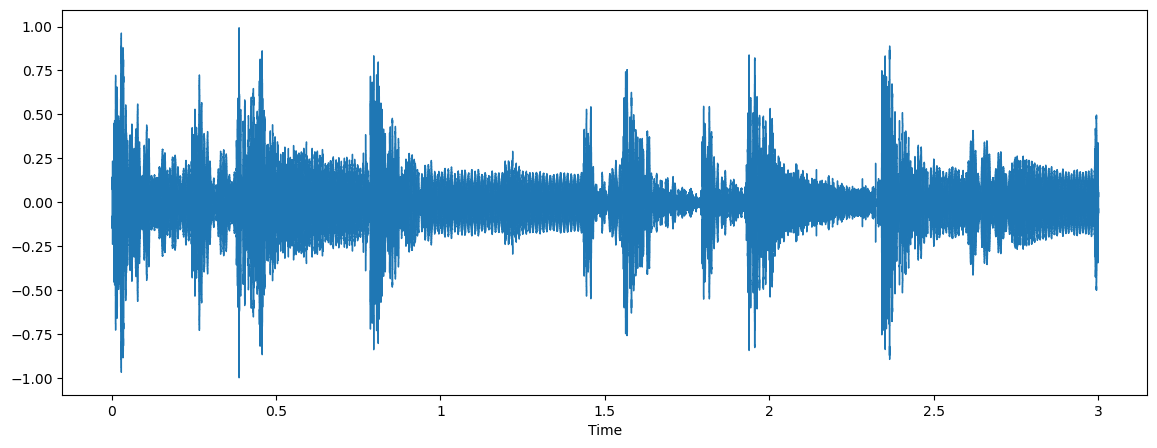

In [13]:
plt.close('all')
plt.figure(figsize=(14, 5))
librosa.display.waveshow(y, sr=sr)

We can perform *feature extraction* to reduce the amount of data to process next. 

To do so, let's extract the MFCCs for this audio; using the default parameters of librosa's function, we will end up with 20 MFCCs per audio's frame. 
*librosa* will take care of the division in frames, analysis and MFCCs extraction.

In [14]:
plt.close('all')
mfccs = librosa.feature.mfcc(y=y, sr=sr)

We have 20 coefficients per frame. Let's see how many frames we have.

In [15]:
plt.close('all')
print('(#MFCCs, #frames): ' + str(mfccs.shape))
print('Total number of MFCCs: ' + str(np.size(mfccs)))

(#MFCCs, #frames): (20, 259)
Total number of MFCCs: 5180


In [16]:
print('We have {} frames with {} MFCCs each. Not bad!'.format(mfccs.shape[1], mfccs.shape[0]))

We have 259 frames with 20 MFCCs each. Not bad!


But let's plot them... We guess they are super-cool!

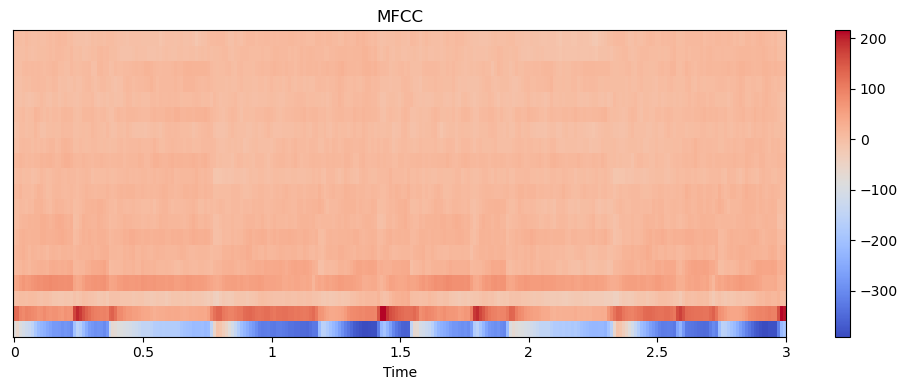

In [17]:
plt.close('all')
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()

In [18]:
plt.close('all')

Our fresh MFCCs are ready to be processed!